**Network Training**

In this lab session, you will learn how to train the Perceptron model of a neuron iteratively, and the experiment with training a whole neural network.

The objectives are:

• Experiment to get an intuition of the sensitibity of a manually tuned perceptron to noise.

• Learn how to implement the weight update rule.

• Learn how to augment the dataset using new noise samples

• Train a whole neural network using the sci-kit learn Python library.

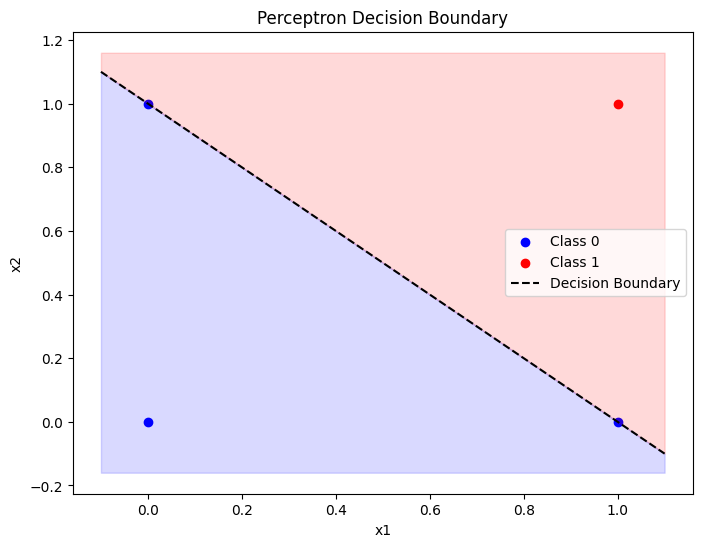

In [266]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0 ,0] ,[0 ,1] ,[1 ,0] ,[1 ,1]])
y = np.array([[0] ,[0] ,[0] ,[1]])
w = np.array([[1.] ,[1.]])
b = -1

# Perceptron output
y_hat =( np . matmul (X , w ) +b >0) . astype (int)

# Plotting
plt.figure ( figsize =(8 ,6) )
flag_label= [0 ,0]
for i in range (y.shape[0]) :
    if y [ i ]==0:
        if flag_label[0]==0:
            flag_label[0]=1
            plt.scatter (X[i ,0], X[i ,1], color ='blue', label ='Class 0')
        else :
            plt.scatter (X[i ,0], X[i ,1], color ='blue')
    else :
        if flag_label [1]==0:
            flag_label [1]=1
            plt.scatter(X[i ,0], X[i ,1], color ='red', label ='Class 1')
        else :
            plt.scatter(X[i,0], X[i,1] , color ='red')

# Decision boundary : w1*x + w2*y + b = 0 = > y = -(w1*x + b)/w2
x_vals = np.linspace (X[:,0].min()-0.1, X[:,0].max()+0.1, 100)

# Level of transparency for shading
AL =0.15
if w [1][0] != 0:
    y_vals = -(w[0][0]* x_vals + b ) / w[1][0]
    plt.plot (x_vals ,y_vals ,'k--', label ='Decision Boundary')
    # Shade above (red) and below ( blue ) the decision boundaryÍÍÍ
    y2 = plt.ylim ()
    plt.fill_between(x_vals, y_vals, y2[1], color='red', alpha= AL)
    plt.fill_between(x_vals, y_vals, y2[0], color='blue', alpha= AL)
else :
    plt.axvline ( - b / w [0][0] , color ='k', linestyle ='--', label ='Decision Boundary')
    # For vertical boundary , shade left / right
    Xrange = np.linspace (X[: ,1].min()-0.1, X[:,1].max()+0.1, 100)
    plt.fill_betweenx(Xrange, -b/w[0][0], plt.xlim()[1], color ='red', alpha= AL)
    plt.fill_betweenx(Xrange, plt.xlim()[0], -b/w[0][0], color='blue', alpha = AL)
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary')
plt.show()


Now add some noise to the data with np.random.randn with sd=0.01 and see what goes on...

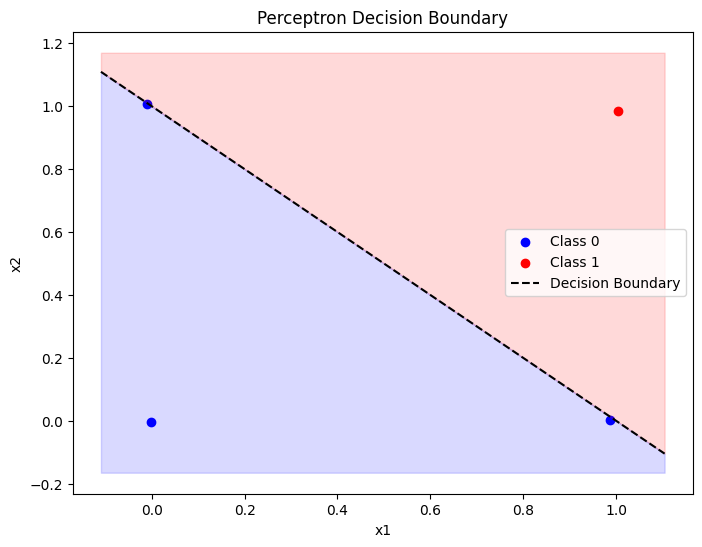

In [267]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0 ,0] ,[0 ,1] ,[1 ,0] ,[1 ,1]])
y = np.array([[0] ,[0] ,[0] ,[1]])

# noise injection
X = X + 0.01*np.random.randn(*X.shape)

w = np.array([[1.] ,[1.]])
b = -1

# Perceptron output
y_hat =( np . matmul (X , w ) +b >0) . astype (int)

# Plotting
plt.figure ( figsize =(8 ,6) )
flag_label= [0 ,0]
for i in range (y.shape[0]) :
    if y [ i ]==0:
        if flag_label[0]==0:
            flag_label[0]=1
            plt.scatter (X[i ,0], X[i ,1], color ='blue', label ='Class 0')
        else :
            plt.scatter (X[i ,0], X[i ,1], color ='blue')
    else :
        if flag_label [1]==0:
            flag_label [1]=1
            plt.scatter(X[i ,0], X[i ,1], color ='red', label ='Class 1')
        else :
            plt.scatter(X[i,0], X[i,1] , color ='red')

# Decision boundary : w1*x + w2*y + b = 0 = > y = -(w1*x + b)/w2
x_vals = np.linspace (X[:,0].min()-0.1, X[:,0].max()+0.1, 100)

# Level of transparency for shading
AL =0.15
if w [1][0] != 0:
    y_vals = -(w[0][0]* x_vals + b ) / w[1][0]
    plt.plot (x_vals ,y_vals ,'k--', label ='Decision Boundary')
    # Shade above (red) and below ( blue ) the decision boundaryÍÍÍ
    y2 = plt.ylim ()
    plt.fill_between(x_vals, y_vals, y2[1], color='red', alpha= AL)
    plt.fill_between(x_vals, y_vals, y2[0], color='blue', alpha= AL)
else :
    plt.axvline ( - b / w [0][0] , color ='k', linestyle ='--', label ='Decision Boundary')
    # For vertical boundary , shade left / right
    Xrange = np.linspace (X[: ,1].min()-0.1, X[:,1].max()+0.1, 100)
    plt.fill_betweenx(Xrange, -b/w[0][0], plt.xlim()[1], color ='red', alpha= AL)
    plt.fill_betweenx(Xrange, plt.xlim()[0], -b/w[0][0], color='blue', alpha = AL)
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary')
plt.show()


In [268]:
X

array([[-9.50018694e-04, -2.69589596e-03],
       [-9.53739385e-03,  1.00733048e+00],
       [ 9.87411043e-01,  1.12916498e-03],
       [ 1.00479929e+00,  9.85835584e-01]])

Now to train the weight of the perceptron with a training function...

In [269]:
def perceptron_train (X, y, w, b, epochs, alpha ) :
    for epoch in range(epochs) :
        for xi, yi in zip(X, y) :
            xi = xi.reshape (1, X.shape[1])
            yi_hat =(np.matmul(xi, w)+b >0).astype(int)
            w += alpha * (yi - yi_hat) * xi.T
            b += alpha * (yi - yi_hat)[0][0]
    return w ,b

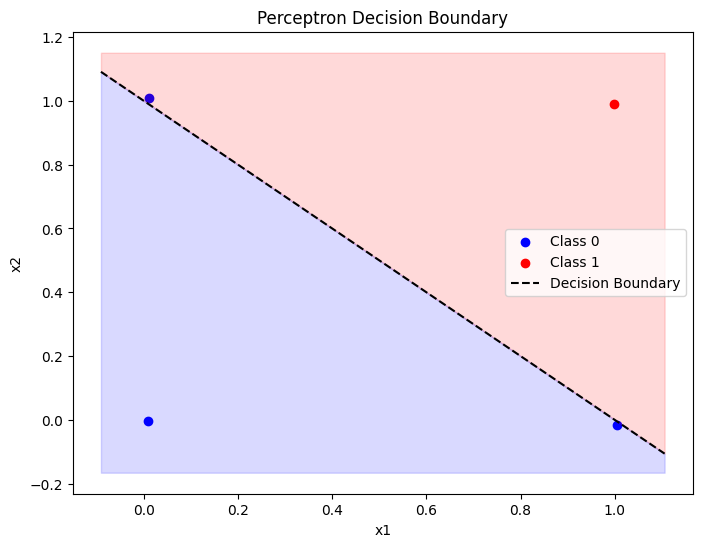

In [270]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0 ,0] ,[0 ,1] ,[1 ,0] ,[1 ,1]])
y = np.array([[0] ,[0] ,[0] ,[1]])

# noise injection
X = X + 0.01*np.random.randn(*X.shape)

w = np.array([[1.] ,[1.]])
b = -1

# Perceptron output
y_hat =( np . matmul (X , w ) +b >0) . astype (int)

# Plotting
plt.figure ( figsize =(8 ,6) )
flag_label= [0 ,0]
for i in range (y.shape[0]) :
    if y [ i ]==0:
        if flag_label[0]==0:
            flag_label[0]=1
            plt.scatter (X[i ,0], X[i ,1], color ='blue', label ='Class 0')
        else :
            plt.scatter (X[i ,0], X[i ,1], color ='blue')
    else :
        if flag_label [1]==0:
            flag_label [1]=1
            plt.scatter(X[i ,0], X[i ,1], color ='red', label ='Class 1')
        else :
            plt.scatter(X[i,0], X[i,1] , color ='red')

# Decision boundary : w1*x + w2*y + b = 0 = > y = -(w1*x + b)/w2
x_vals = np.linspace (X[:,0].min()-0.1, X[:,0].max()+0.1, 100)

# Level of transparency for shading
AL =0.15
if w [1][0] != 0:
    y_vals = -(w[0][0]* x_vals + b ) / w[1][0]
    plt.plot (x_vals ,y_vals ,'k--', label ='Decision Boundary')
    # Shade above (red) and below ( blue ) the decision boundaryÍÍÍ
    y2 = plt.ylim ()
    plt.fill_between(x_vals, y_vals, y2[1], color='red', alpha= AL)
    plt.fill_between(x_vals, y_vals, y2[0], color='blue', alpha= AL)
else :
    plt.axvline ( - b / w [0][0] , color ='k', linestyle ='--', label ='Decision Boundary')
    # For vertical boundary , shade left / right
    Xrange = np.linspace (X[: ,1].min()-0.1, X[:,1].max()+0.1, 100)
    plt.fill_betweenx(Xrange, -b/w[0][0], plt.xlim()[1], color ='red', alpha= AL)
    plt.fill_betweenx(Xrange, plt.xlim()[0], -b/w[0][0], color='blue', alpha = AL)
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary')
plt.show()


Now we gonna add some more data to hammer home this point...
We will also train the perceptron using that function we made in this one...

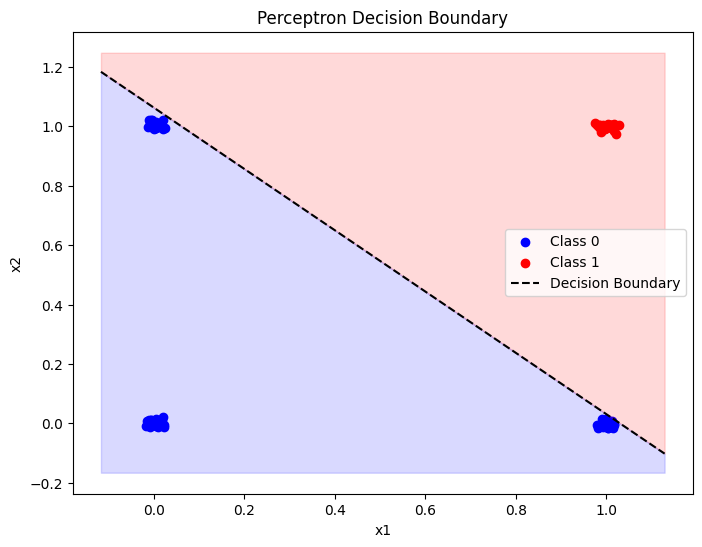

In [271]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0 ,0] ,[0 ,1] ,[1 ,0] ,[1 ,1]])
y = np.array([[0] ,[0] ,[0] ,[1]])

X = np.repeat(X, 25, axis=0)
y = np.repeat(y, 25, axis=0)

# noise injection
X = X + 0.01*np.random.randn(*X.shape)

w = np.array([[1.] ,[1.]])
b = -1

#TRAINING!!!
w, b = perceptron_train(X, y, w, b, epochs=1, alpha=0.015)

# Perceptron output
y_hat =( np . matmul (X , w ) +b >0) . astype (int)

# Plotting
plt.figure ( figsize =(8 ,6) )
flag_label= [0 ,0]
for i in range (y.shape[0]) :
    if y [ i ]==0:
        if flag_label[0]==0:
            flag_label[0]=1
            plt.scatter (X[i ,0], X[i ,1], color ='blue', label ='Class 0')
        else :
            plt.scatter (X[i ,0], X[i ,1], color ='blue')
    else :
        if flag_label [1]==0:
            flag_label [1]=1
            plt.scatter(X[i ,0], X[i ,1], color ='red', label ='Class 1')
        else :
            plt.scatter(X[i,0], X[i,1] , color ='red')

# Decision boundary : w1*x + w2*y + b = 0 = > y = -(w1*x + b)/w2
x_vals = np.linspace (X[:,0].min()-0.1, X[:,0].max()+0.1, 100)

# Level of transparency for shading
AL =0.15
if w [1][0] != 0:
    y_vals = -(w[0][0]* x_vals + b ) / w[1][0]
    plt.plot (x_vals ,y_vals ,'k--', label ='Decision Boundary')
    # Shade above (red) and below ( blue ) the decision boundaryÍÍÍ
    y2 = plt.ylim ()
    plt.fill_between(x_vals, y_vals, y2[1], color='red', alpha= AL)
    plt.fill_between(x_vals, y_vals, y2[0], color='blue', alpha= AL)
else :
    plt.axvline ( - b / w [0][0] , color ='k', linestyle ='--', label ='Decision Boundary')
    # For vertical boundary , shade left / right
    Xrange = np.linspace (X[: ,1].min()-0.1, X[:,1].max()+0.1, 100)
    plt.fill_betweenx(Xrange, -b/w[0][0], plt.xlim()[1], color ='red', alpha= AL)
    plt.fill_betweenx(Xrange, plt.xlim()[0], -b/w[0][0], color='blue', alpha = AL)
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary')
plt.show()


Feel free to fuck around with the epochs and alpha arguments to see how they change the decision boundary...

Now lets chnage the target outputs from the current [0, 0, 0, 1] (AND) to something like [0, 0, 1, 1]

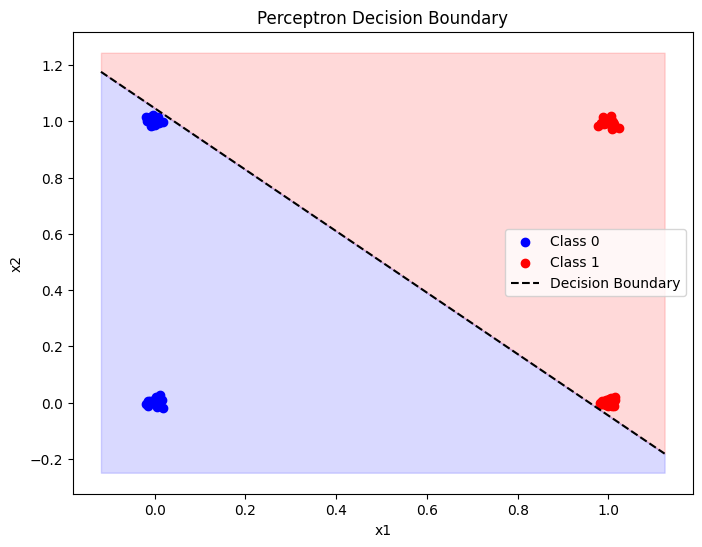

In [272]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0 ,0] ,[0 ,1] ,[1 ,0] ,[1 ,1]])
y = np.array([[0] ,[0] ,[1] ,[1]])

X = np.repeat(X, 25, axis=0)
y = np.repeat(y, 25, axis=0)

# noise injection
X = X + 0.01*np.random.randn(*X.shape)

w = np.array([[1.] ,[1.]])
b = -1

#TRAINING!!!
w, b = perceptron_train(X, y, w, b, epochs=1, alpha=0.045)

# Perceptron output
y_hat =( np . matmul (X , w ) +b >0) . astype (int)

# Plotting
plt.figure ( figsize =(8 ,6) )
flag_label= [0 ,0]
for i in range (y.shape[0]) :
    if y [ i ]==0:
        if flag_label[0]==0:
            flag_label[0]=1
            plt.scatter (X[i ,0], X[i ,1], color ='blue', label ='Class 0')
        else :
            plt.scatter (X[i ,0], X[i ,1], color ='blue')
    else :
        if flag_label [1]==0:
            flag_label [1]=1
            plt.scatter(X[i ,0], X[i ,1], color ='red', label ='Class 1')
        else :
            plt.scatter(X[i,0], X[i,1] , color ='red')

# Decision boundary : w1*x + w2*y + b = 0 = > y = -(w1*x + b)/w2
x_vals = np.linspace (X[:,0].min()-0.1, X[:,0].max()+0.1, 100)

# Level of transparency for shading
AL =0.15
if w [1][0] != 0:
    y_vals = -(w[0][0]* x_vals + b ) / w[1][0]
    plt.plot (x_vals ,y_vals ,'k--', label ='Decision Boundary')
    # Shade above (red) and below ( blue ) the decision boundaryÍÍÍ
    y2 = plt.ylim ()
    plt.fill_between(x_vals, y_vals, y2[1], color='red', alpha= AL)
    plt.fill_between(x_vals, y_vals, y2[0], color='blue', alpha= AL)
else :
    plt.axvline ( - b / w [0][0] , color ='k', linestyle ='--', label ='Decision Boundary')
    # For vertical boundary , shade left / right
    Xrange = np.linspace (X[: ,1].min()-0.1, X[:,1].max()+0.1, 100)
    plt.fill_betweenx(Xrange, -b/w[0][0], plt.xlim()[1], color ='red', alpha= AL)
    plt.fill_betweenx(Xrange, plt.xlim()[0], -b/w[0][0], color='blue', alpha = AL)
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary')
plt.show()


Getting the boundary good will like require more fucking around with the alpha

Now we are gonna use sklearn to do this with a multilayer perceptron...
We also have to modify the plotting logic a bit


C:\Users\joshp\PycharmProjects\EE32009_SNN\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


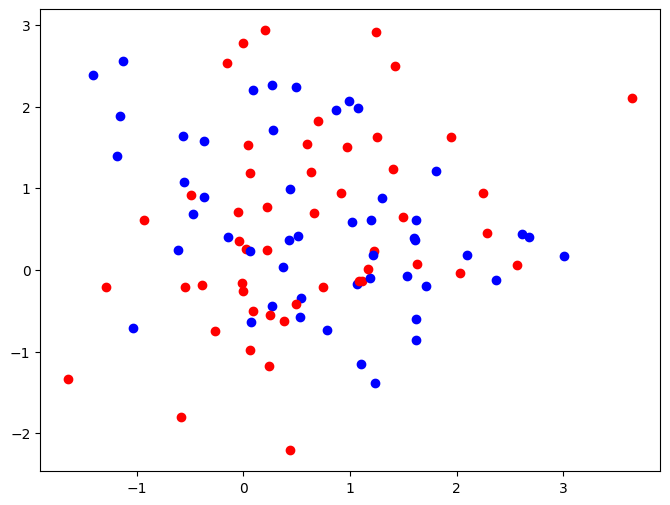

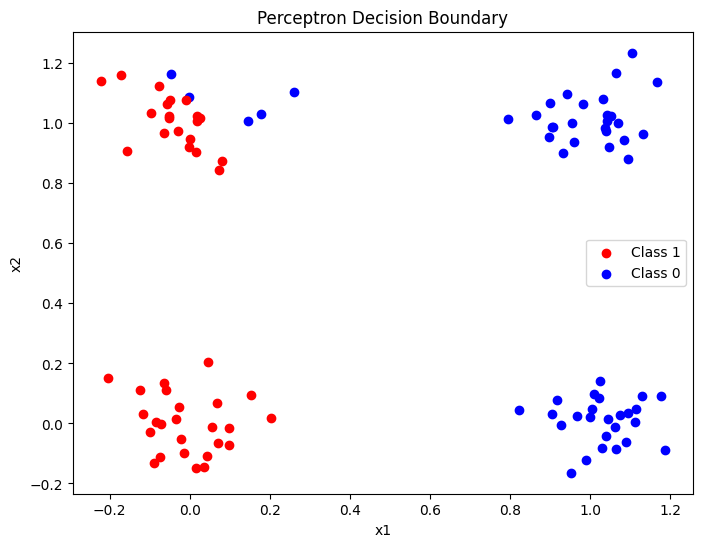

In [273]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0 ,0],[0 ,1],[1 ,0],[1 ,1]])
y = np.array([[1],[0],[0],[1]])

X = np.repeat(X, 25, axis=0)
y = np.repeat(y, 25, axis=0)

# noise injection
X = X + 1*np.random.randn(*X.shape)

# Some training data...
X_test = np.array([[0 ,0],[0 ,1],[1 ,0],[1 ,1]])
y_test = np.array([[1],[0],[0],[1]])
X_test = np.repeat(X_test, 25, axis =0)
X_test = X_test + (0.1 * np.random.randn(*X_test.shape))
y_test = np.repeat(y_test, 25, axis =0)

w = np.array([[1.] ,[1.]])
b = -1

#TRAINING!!!
w, b = perceptron_train(X, y, w, b, epochs=1, alpha=0.045)

# Perceptron output
y_hat =( np . matmul (X , w ) +b >0) . astype (int)


# Plotting
plt.figure(figsize =(8,6))
flag_label = [0,0]
for i in range (y.shape[0]) :
    if y[i]==0:
        if flag_label[0]==0:
            flag_label[0]=1
            plt.scatter(X[i,0], X[i,1] ,color ='blue', label='Class 0')
        else:
            plt.scatter(X[i,0], X[i,1], color='blue')
    else:
        if flag_label[1]==0:
            flag_label[1]=1
            plt.scatter(X[i,0], X[i,1], color='red', label='Class 1')
        else:
            plt.scatter(X[i,0], X[i,1], color='red')

# Instantiate an MPLClassifier from sk-learn
# Create a neural network with no hidden layer , 2 inputs , 1 output
clf = MLPClassifier(hidden_layer_sizes=(),
                    activation ='logistic', # Use built -in sigmoid activation
                    solver='sgd',
                    learning_rate_init=0.1,
                    max_iter=1000)

clf.fit(X, y)
y_hat = clf.predict(X_test)


# Plotting
plt.figure(figsize =(8,6))
flag_label = [0,0]
for i in range (y.shape[0]) :
    if y_hat[i]==0:
        if flag_label[0]==0:
            flag_label[0]=1
            plt.scatter(X_test[i,0], X_test[i,1] ,color ='blue', label='Class 0')
        else:
            plt.scatter(X_test[i,0], X_test[i,1], color='blue')
    else:
        if flag_label[1]==0:
            flag_label[1]=1
            plt.scatter(X_test[i,0], X_test[i,1], color='red', label='Class 1')
        else:
            plt.scatter(X_test[i,0], X_test[i,1], color='red')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary')
plt.show()


Look how its able to take the noisy asf data with a sd of 1 and classify it really well!

Now because torch is better lets do this with torch also...

Epoch 1000/1000, Loss: 0.0009


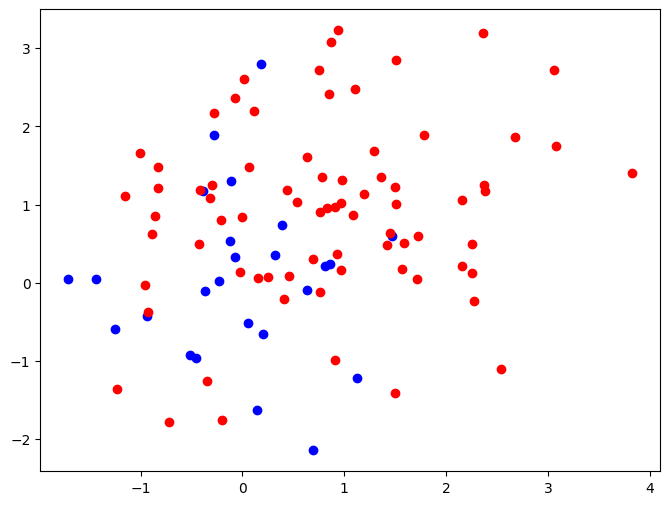

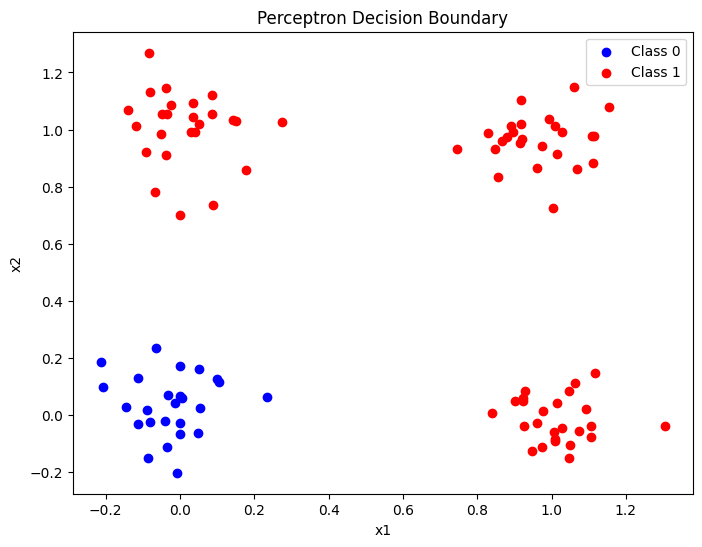

In [274]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0 ,0],[0 ,1],[1 ,0],[1 ,1]])
y = np.array([[0],[1],[1],[1]])

X = np.repeat(X, 25, axis=0)
y = np.repeat(y, 25, axis=0)

# noise injection
X = X + 1*np.random.randn(*X.shape)

# Some training data...
X_test = np.array([[0 ,0],[0 ,1],[1 ,0],[1 ,1]])
y_test = np.array([[0],[1],[1],[1]])
X_test = np.repeat(X_test, 25, axis =0)
X_test = X_test + (0.1 * np.random.randn(*X_test.shape))
y_test = np.repeat(y_test, 25, axis =0)

w = np.array([[1.] ,[1.]])
b = -1

#TRAINING!!!
w, b = perceptron_train(X, y, w, b, epochs=1, alpha=0.045)

# Perceptron output
y_hat =( np . matmul (X , w ) +b >0) . astype (int)


# Plotting
plt.figure(figsize =(8,6))
flag_label = [0,0]
for i in range (y.shape[0]) :
    if y[i]==0:
        if flag_label[0]==0:
            flag_label[0]=1
            plt.scatter(X[i,0], X[i,1] ,color ='blue', label='Class 0')
        else:
            plt.scatter(X[i,0], X[i,1], color='blue')
    else:
        if flag_label[1]==0:
            flag_label[1]=1
            plt.scatter(X[i,0], X[i,1], color='red', label='Class 1')
        else:
            plt.scatter(X[i,0], X[i,1], color='red')

# Instantiate an MPLClassifier from sk-learn
# Create a neural network with no hidden layer , 2 inputs , 1 output
X_tensor = torch.Tensor(X)
y_tensor = torch.Tensor(y)
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test)

torch_model = nn.Sequential(
    nn.Linear(2, 10),  # 2 inputs → 10 hidden units
    nn.ReLU(),
    nn.Linear(10, 1),  # 10 hidden → 1 output
    nn.Sigmoid()
)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(torch_model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)

# training
epochs = 1000
for epoch in range(epochs):
    torch_model.train()
    y_pred = torch_model(X_test_tensor)
    loss = criterion(y_pred, y_test_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # every 20% of epochs post info
    if (epoch+1) % epochs*0.2 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

with torch.no_grad():
    y_hat = (torch_model(X_test_tensor) > 0.5).int()


# Plotting
plt.figure(figsize =(8,6))
flag_label = [0,0]
for i in range (y.shape[0]) :
    if y_hat[i]==0:
        if flag_label[0]==0:
            flag_label[0]=1
            plt.scatter(X_test[i,0], X_test[i,1] ,color ='blue', label='Class 0')
        else:
            plt.scatter(X_test[i,0], X_test[i,1], color='blue')
    else:
        if flag_label[1]==0:
            flag_label[1]=1
            plt.scatter(X_test[i,0], X_test[i,1], color='red', label='Class 1')
        else:
            plt.scatter(X_test[i,0], X_test[i,1], color='red')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary')
plt.show()
